학습의 자동 중단
- iris.csv를 사용해서 학습의 자동 중단 추가하기
- 아이리스 데이터에서 자동 중단이 일어나는 시점 확인해보기
- Epoch : 3500
- batch_size : 50

Epoch 1/3500
2/2 [==============================] - 1s 152ms/step - loss: 2.6070 - accuracy: 0.3600 - val_loss: 2.7158 - val_accuracy: 0.2800

Epoch 00001: val_loss improved from inf to 2.71583, saving model to ./model/01-2.7158.hdf5
Epoch 2/3500
2/2 [==============================] - 0s 18ms/step - loss: 2.5462 - accuracy: 0.3600 - val_loss: 2.6508 - val_accuracy: 0.2800

Epoch 00002: val_loss improved from 2.71583 to 2.65082, saving model to ./model/02-2.6508.hdf5
Epoch 3/3500
2/2 [==============================] - 0s 16ms/step - loss: 2.4883 - accuracy: 0.3600 - val_loss: 2.5860 - val_accuracy: 0.2800

Epoch 00003: val_loss improved from 2.65082 to 2.58601, saving model to ./model/03-2.5860.hdf5
Epoch 4/3500
2/2 [==============================] - 0s 15ms/step - loss: 2.4293 - accuracy: 0.3600 - val_loss: 2.5213 - val_accuracy: 0.2800

Epoch 00004: val_loss improved from 2.58601 to 2.52129, saving model to ./model/04-2.5213.hdf5
Epoch 5/3500
2/2 [==============================] - 0s 

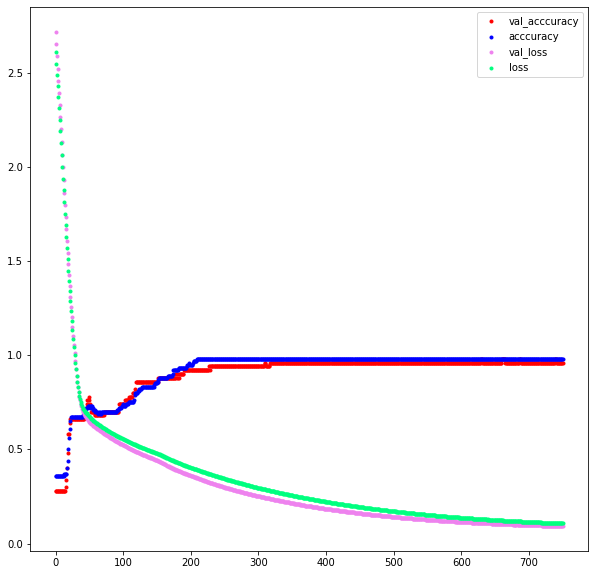

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import tensorflow as tf
#import os
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/iris.csv", header=None)

#데이터 섞어주기
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

#문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

#모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation = 'relu'))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
#patience=10 : 10번동안 나빠지면 중단
#EarlyStopping : 학습된걸 보면서 강제로 정지(검증용셀의 loss(val_loss를 본다)

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
#ModelCheckpoint : val_loss값이 좋아질때만 modelpath에 저장

#모델 실행
history = model.fit(X, Y_encoded, validation_split=0.33, epochs=3500, batch_size=50, callbacks=[early_stopping_callback, checkpointer])

#결과 출력
#print("\nAccuracy : %.2f%%" % (model.evaluate(X, Y_encoded)[1]*100))

#val값에 테스트셋으로 실험 결과의 오차 값을 저장
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

#원래 값에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']
y_loss = history.history['loss']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(10,10))
plt.plot(x_len, y_vacc, "o", c="red", markersize=3, label='val_acccuracy')
plt.plot(x_len, y_acc, "o", c="blue", markersize=3, label='acccuracy')
plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="springgreen", markersize=3, label='loss')

plt.legend()
plt.show()

# 보스턴 집값 예측하기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd
import tensorflow as tf
import numpy as np

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df = pd.read_csv("/housing.csv", delim_whitespace=True, header=None)

#데이터 분류
dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

#모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')
#mean_squared_error : 평균 제곱 오차

#모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)

#예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()#flatten : 일차원배열로 만들어줌(안하면 이차원배열이라 밑에 계산 안됨)
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

Epoch 1/200
36/36 [==============================] - 0s 1ms/step - loss: 8438.1172
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 732.8683
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 512.5950
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 388.6990
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 256.9753
Epoch 6/200
36/36 [==============================] - 0s 1ms/step - loss: 170.7661
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 135.6643
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 123.0021
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 92.7171
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 80.1417
Epoch 11/200
36/36 [==============================] - 0s 1ms/step - loss: 72.3035
Epoch 12/200
36/36 [==============================] - 0s 1ms/step - loss: 69.8260
Epoch 13/200
36/

선형회귀는 로지스트회귀처럼 1과0으로 이루어진게 아닌 자연수의 값이라 accuracy가 없다  
1인지 0인지에서는 맞는지 틀린지를 알 수 있지만  
수치상 5.0%와 5.1%는 맞는지 틀린지 정하기 애매하다

Epoch 1/5000
24/24 [==============================] - 1s 6ms/step - loss: 10934.6426 - val_loss: 3399.1145

Epoch 00001: val_loss did not improve from 0.09285
Epoch 2/5000
24/24 [==============================] - 0s 3ms/step - loss: 1448.8398 - val_loss: 613.5666

Epoch 00002: val_loss did not improve from 0.09285
Epoch 3/5000
24/24 [==============================] - 0s 2ms/step - loss: 584.2853 - val_loss: 500.0798

Epoch 00003: val_loss did not improve from 0.09285
Epoch 4/5000
24/24 [==============================] - 0s 2ms/step - loss: 496.2946 - val_loss: 431.5092

Epoch 00004: val_loss did not improve from 0.09285
Epoch 5/5000
24/24 [==============================] - 0s 3ms/step - loss: 412.0949 - val_loss: 354.8476

Epoch 00005: val_loss did not improve from 0.09285
Epoch 6/5000
24/24 [==============================] - 0s 2ms/step - loss: 326.3025 - val_loss: 274.1810

Epoch 00006: val_loss did not improve from 0.09285
Epoch 7/5000
24/24 [==============================] - 0s 3ms

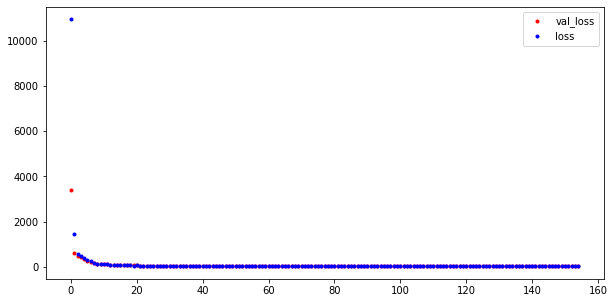

실제가격 : 19.400, 예상가격 : 23.431
실제가격 : 10.900, 예상가격 : 16.942
실제가격 : 34.700, 예상가격 : 31.906
실제가격 : 15.600, 예상가격 : 15.846
실제가격 : 22.600, 예상가격 : 26.616
실제가격 : 29.000, 예상가격 : 28.338
실제가격 : 23.800, 예상가격 : 26.239
실제가격 : 45.400, 예상가격 : 41.711
실제가격 : 50.000, 예상가격 : 33.624
실제가격 : 26.700, 예상가격 : 29.739


In [6]:
#보스턴 집값 예측 자동 중단 및 그래프 적용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/housing.csv", delim_whitespace=True, header=None)
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

#모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

#모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10, callbacks=[early_stopping_callback, checkpointer])

hist = pd.DataFrame(history.history)
print(hist.tail())

#val값에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

#원래 값에 학습셋으로 측정한 정확도의 값을 저장
y_loss = history.history['loss']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=3, label='loss')

plt.legend()
plt.show()

#예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

보스턴 집값 예측 정규화 적용
- X_train과 X_test 정규화 하기
- 정규화 방법은 Z_Score Normaliztion을 적용
- 동일 결과를 StandardScaler()를 사용해 보기
- 실제 data와 예측 data의 차를 평균을 통해 정규화 전/후 비교해보기
- 공식 : (X-평균) / 표준편차  
mean = X_train.mean(axis=0)  
X_train -= mean  
std = X_train.std(axis=0)  
X_train /= std

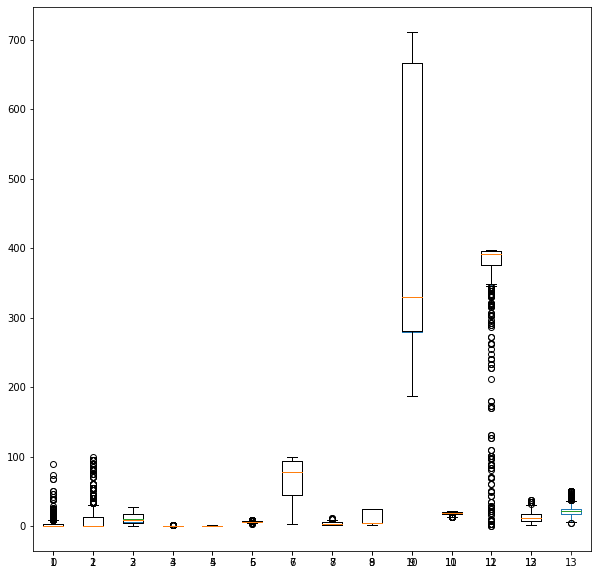

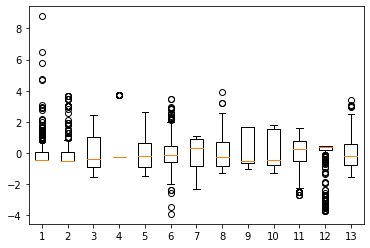

Epoch 1/5000
24/24 [==============================] - 0s 6ms/step - loss: 598.5685 - val_loss: 583.3478

Epoch 00001: val_loss improved from inf to 583.34778, saving model to ./model/01-583.3478.hdf5
Epoch 2/5000
24/24 [==============================] - 0s 3ms/step - loss: 576.6685 - val_loss: 565.3906

Epoch 00002: val_loss improved from 583.34778 to 565.39056, saving model to ./model/02-565.3906.hdf5
Epoch 3/5000
24/24 [==============================] - 0s 2ms/step - loss: 557.5626 - val_loss: 543.7240

Epoch 00003: val_loss improved from 565.39056 to 543.72400, saving model to ./model/03-543.7240.hdf5
Epoch 4/5000
24/24 [==============================] - 0s 3ms/step - loss: 530.7675 - val_loss: 511.1332

Epoch 00004: val_loss improved from 543.72400 to 511.13318, saving model to ./model/04-511.1332.hdf5
Epoch 5/5000
24/24 [==============================] - 0s 2ms/step - loss: 493.5795 - val_loss: 466.9056

Epoch 00005: val_loss improved from 511.13318 to 466.90564, saving model to .

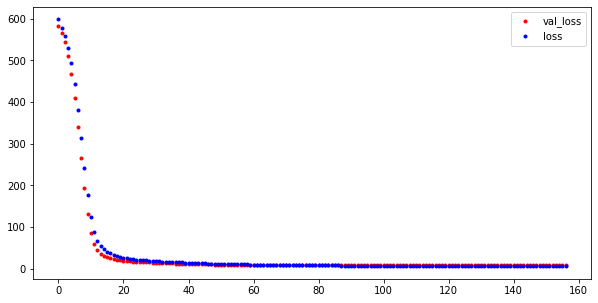

실제가격 : 19.400, 예상가격 : 18.025
실제가격 : 10.900, 예상가격 : 12.650
실제가격 : 34.700, 예상가격 : 31.101
실제가격 : 15.600, 예상가격 : 15.147
실제가격 : 22.600, 예상가격 : 24.207
실제가격 : 29.000, 예상가격 : 32.969
실제가격 : 23.800, 예상가격 : 21.323
실제가격 : 45.400, 예상가격 : 42.453
실제가격 : 50.000, 예상가격 : 47.442
실제가격 : 26.700, 예상가격 : 31.217
2.566477078513095


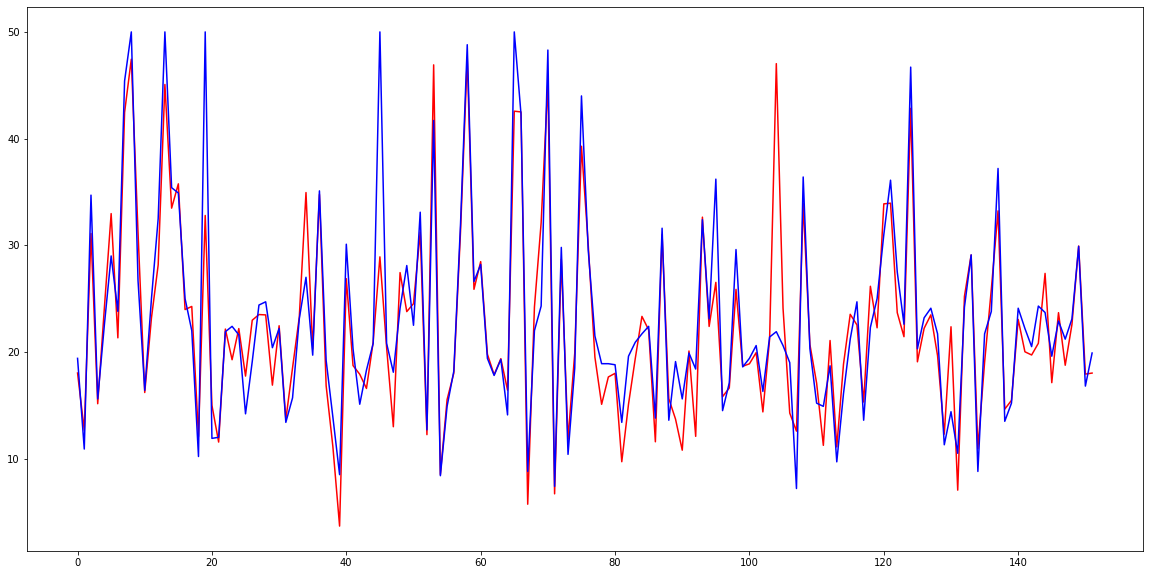

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df_pre = pd.read_csv("/housing.csv", delim_whitespace=True, header=None)
df = df_pre.sample(frac=1)

#데이터 분류
dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

#pandas의 plot box를 사용해 data 확인해보기
df.plot.box(figsize=(10,10))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

#X_train만 boxplot으로 시각화 확인
plt.boxplot(X_train)
plt.show()

#정규화
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std
X_test -= mean
X_test /= std

#X_train만 boxplot으로 정규화 이후 시각화 확인
plt.boxplot(X_train)
plt.show()

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

#모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

#자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

#모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=10, callbacks=[early_stopping_callback, checkpointer])

hist = pd.DataFrame(history.history)
print(hist.tail())

#val값에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

#원래 값에 학습셋으로 측정한 정확도의 값을 저장
y_loss = history.history['loss']

#x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt.figure(figsize=(10,5))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=3, label='loss')

plt.legend()
plt.show()

#예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

#예측 값과 실제값 그래프로 비교
plt.figure(figsize=(20,10))
plt.plot(Y_prediction, c='red')
plt.plot(Y_test, c="blue")

#예측값과 실제값 오차 평균을 측정
avr = abs(Y_prediction - Y_test).mean()
print(avr)